In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import urllib
import os

%matplotlib inline
pd.set_option('display.float_format', lambda x: '%.5f' % x) #opción para evitar la notacion cientifica

url = "https://covid19.who.int/WHO-COVID-19-global-data.csv"
file_path = os.path.join("data", "covid")
os.makedirs(file_path, exist_ok=True)
csv_path = os.path.join(file_path, "WHO-COVID-19-global-data.csv")
urllib.request.urlretrieve(url, csv_path)
df = pd.read_csv(csv_path)
df.columns = [col.strip() for col in df.columns]
df

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-02-24,AF,Afghanistan,EMRO,5,5,0,0
1,2020-02-25,AF,Afghanistan,EMRO,0,5,0,0
2,2020-02-26,AF,Afghanistan,EMRO,0,5,0,0
3,2020-02-27,AF,Afghanistan,EMRO,0,5,0,0
4,2020-02-28,AF,Afghanistan,EMRO,0,5,0,0
...,...,...,...,...,...,...,...,...
32303,2020-07-29,ZW,Zimbabwe,AFRO,113,2817,4,40
32304,2020-07-30,ZW,Zimbabwe,AFRO,62,2879,1,41
32305,2020-07-31,ZW,Zimbabwe,AFRO,213,3092,12,53
32306,2020-08-01,ZW,Zimbabwe,AFRO,77,3169,14,67


In [2]:
df.columns

Index(['Date_reported', 'Country_code', 'Country', 'WHO_region', 'New_cases',
       'Cumulative_cases', 'New_deaths', 'Cumulative_deaths'],
      dtype='object')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32308 entries, 0 to 32307
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Date_reported      32308 non-null  object
 1   Country_code       32166 non-null  object
 2   Country            32308 non-null  object
 3   WHO_region         32308 non-null  object
 4   New_cases          32308 non-null  int64 
 5   Cumulative_cases   32308 non-null  int64 
 6   New_deaths         32308 non-null  int64 
 7   Cumulative_deaths  32308 non-null  int64 
dtypes: int64(4), object(4)
memory usage: 2.0+ MB


In [4]:
df_col = df[df.Country == "Colombia"][["Date_reported", "New_cases"]]
df_arg = df[df.Country == "Argentina"][["Date_reported", "New_cases"]]
df_per = df[df.Country == "Peru"][["Date_reported", "New_cases"]]
df_ecu = df[df.Country == "Ecuador"][["Date_reported", "New_cases"]]
df_chi = df[df.Country == "Chile"][["Date_reported", "New_cases"]]
df_rwa = df[df.Country == "Rwanda"][["Date_reported", "New_cases"]]
df_ven = df[df.Country_code == "VE"][["Date_reported", "New_cases"]]
df_bra = df[df.Country == "Brazil"][["Date_reported", "New_cases"]]
df_usa = df[df.Country_code == "US"][["Date_reported", "New_cases"]]
df_ven.columns = ["Date_reported", "New_cases_ven"]
df_ven = pd.merge(df_ven, df_col, how='left', left_on="Date_reported", right_on="Date_reported")
df_ven.columns = ["Date_reported", "New_cases_ven", "New_cases_col"]
df_ven = pd.merge(df_ven, df_chi, how='left', left_on="Date_reported", right_on="Date_reported")
df_ven.columns = ["Date_reported", "New_cases_ven", "New_cases_col", "New_cases_chi"]
df_ven = pd.merge(df_ven, df_ecu, how='left', left_on="Date_reported", right_on="Date_reported")
df_ven.columns = ["Date_reported", "New_cases_ven","New_cases_col", "New_cases_chi","New_cases_ecu"]
df_ven = pd.merge(df_ven, df_per, how='left', left_on="Date_reported", right_on="Date_reported")
df_ven.columns = ["Date_reported", "New_cases_ven", "New_cases_col", "New_cases_chi","New_cases_ecu", "New_cases_per"]
df_ven = pd.merge(df_ven, df_arg, how='left', left_on="Date_reported", right_on="Date_reported")
df_ven.columns = ["Date_reported", "New_cases_ven", "New_cases_col", "New_cases_chi","New_cases_ecu", "New_cases_per", "New_cases_arg"]
df_ven = pd.merge(df_ven, df_bra, how='left', left_on="Date_reported", right_on="Date_reported")
df_ven.columns = ["Date_reported", "New_cases_ven", "New_cases_col", "New_cases_chi","New_cases_ecu", "New_cases_per", "New_cases_arg", "New_cases_bra"]
df_ven = pd.merge(df_ven, df_usa, how='left', left_on="Date_reported", right_on="Date_reported")
df_ven.columns = ["Date_reported", "New_cases_ven", "New_cases_col", "New_cases_chi","New_cases_ecu", "New_cases_per", "New_cases_arg", "New_cases_bra", "New_cases_usa"]
df_ven = pd.merge(df_ven, df_rwa, how='left', left_on="Date_reported", right_on="Date_reported")
df_ven.columns = ["Date_reported", "New_cases_ven", "New_cases_col", "New_cases_chi","New_cases_ecu", "New_cases_per", "New_cases_arg", "New_cases_bra", "New_cases_usa", "New_cases_rwa"]
df_ven["New_cases_roll_ven"] = df_ven.New_cases_ven.rolling(7).mean()
df_ven["New_cases_roll_col"] = df_ven.New_cases_col.rolling(7).mean()
df_ven["New_cases_roll_chi"] = df_ven.New_cases_chi.rolling(7).mean()
df_ven["New_cases_roll_ecu"] = df_ven.New_cases_ecu.rolling(7).mean()
df_ven["New_cases_roll_per"] = df_ven.New_cases_per.rolling(7).mean()
df_ven["New_cases_roll_arg"] = df_ven.New_cases_arg.rolling(7).mean()
df_ven["New_cases_roll_bra"] = df_ven.New_cases_bra.rolling(7).mean()
df_ven["New_cases_roll_usa"] = df_ven.New_cases_usa.rolling(7).mean()
df_ven["New_cases_roll_rwa"] = df_ven.New_cases_rwa.rolling(7).mean()
df_ven = df_ven[~np.isnan(df_ven.New_cases_roll_ven)] 

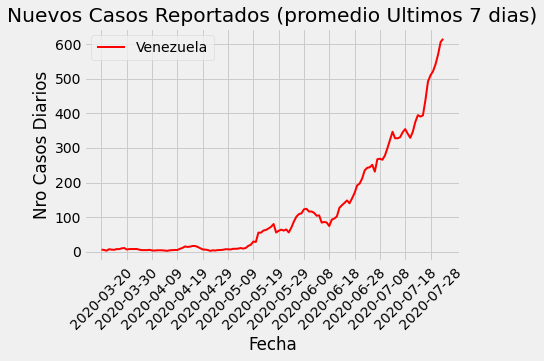

In [5]:
plt.style.use('fivethirtyeight')
plt.plot(df_ven.Date_reported, df_ven.New_cases_roll_ven, color='red', linewidth=2, label='Venezuela')
plt.ylabel('Nro Casos Diarios')
plt.xlabel('Fecha')
plt.title('Nuevos Casos Reportados (promedio Ultimos 7 dias)')
x_ticks = np.arange(0, len(df_ven.Date_reported), 10)
plt.xticks(x_ticks ,rotation=45)
plt.legend()
plt.grid(True)
plt.show()

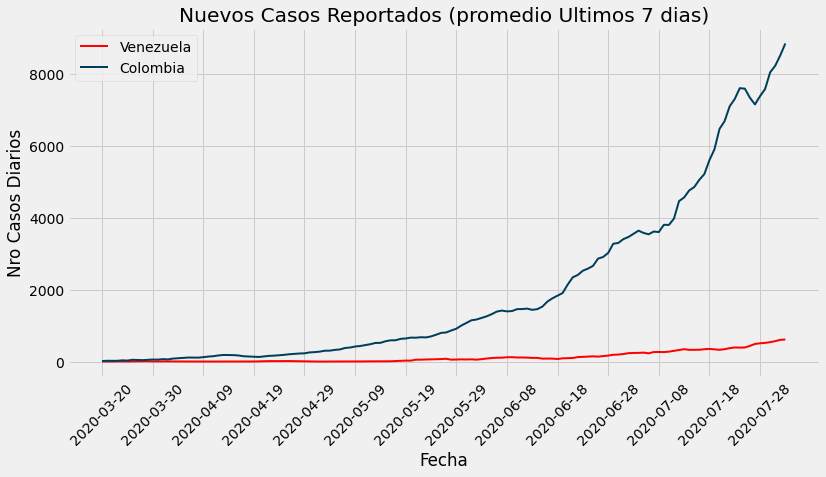

In [6]:
plt.figure(figsize=(12,6))
plt.style.use('fivethirtyeight')
plt.plot(df_ven.Date_reported, df_ven.New_cases_roll_ven, color='red', linewidth=2, 
label='Venezuela')
plt.plot(df_ven.Date_reported, df_ven.New_cases_roll_col, color='#003f5c', linewidth=2, 
label='Colombia')
plt.ylabel('Nro Casos Diarios')
plt.xlabel('Fecha')
plt.title('Nuevos Casos Reportados (promedio Ultimos 7 dias)')
x_ticks = np.arange(0, len(df_ven.Date_reported), 10)
plt.xticks(x_ticks ,rotation=45)
plt.legend()
plt.grid(True)
plt.show()

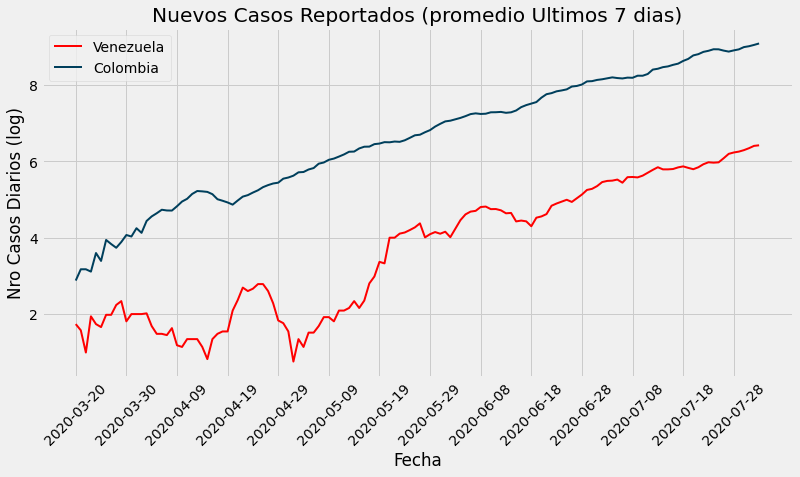

In [7]:
plt.figure(figsize=(12,6))
plt.style.use('fivethirtyeight')
plt.plot(df_ven.Date_reported, np.log(df_ven.New_cases_roll_ven), color='red', linewidth=2, 
label='Venezuela')
plt.plot(df_ven.Date_reported, np.log(df_ven.New_cases_roll_col), color='#003f5c', linewidth=2, 
label='Colombia')
plt.ylabel('Nro Casos Diarios (log)')
plt.xlabel('Fecha')
plt.title('Nuevos Casos Reportados (promedio Ultimos 7 dias)')
x_ticks = np.arange(0, len(df_ven.Date_reported), 10)
plt.xticks(x_ticks ,rotation=45)
plt.legend()
plt.grid(True)
plt.show()

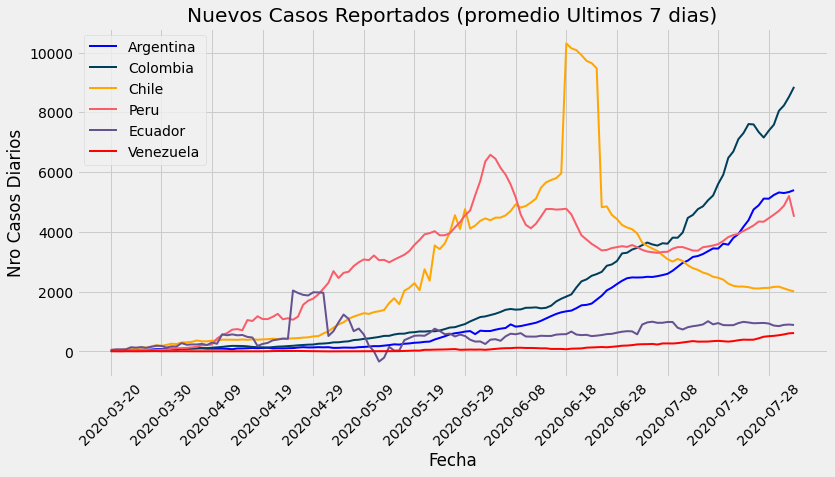

In [8]:
plt.figure(figsize=(12,6))
plt.style.use('fivethirtyeight')
plt.plot(df_ven.Date_reported, df_ven.New_cases_roll_arg, color='blue', linewidth=2, 
label='Argentina')
plt.plot(df_ven.Date_reported, df_ven.New_cases_roll_col, color='#003f5c', linewidth=2, 
label='Colombia')
plt.plot(df_ven.Date_reported, df_ven.New_cases_roll_chi, color='#ffa600', linewidth=2, 
label='Chile')
plt.plot(df_ven.Date_reported, df_ven.New_cases_roll_per, color='#f95d6a', linewidth=2, 
label='Peru')
plt.plot(df_ven.Date_reported, df_ven.New_cases_roll_ecu, color='#665191', linewidth=2, 
label='Ecuador')
plt.plot(df_ven.Date_reported, df_ven.New_cases_roll_ven, color='red', linewidth=2, 
label='Venezuela')
plt.ylabel('Nro Casos Diarios')
plt.xlabel('Fecha')
plt.title('Nuevos Casos Reportados (promedio Ultimos 7 dias)')
x_ticks = np.arange(0, len(df_ven.Date_reported), 10)
plt.xticks(x_ticks ,rotation=45)
plt.legend()
plt.grid(True)
plt.show()

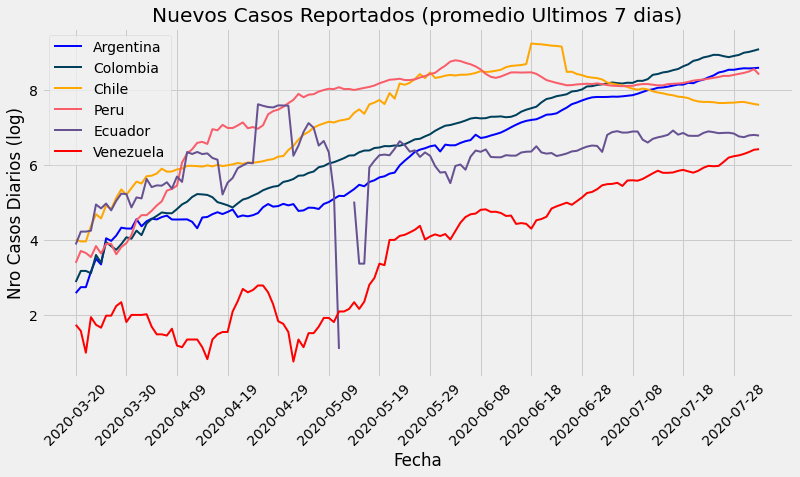

In [9]:
plt.figure(figsize=(12,6))
plt.style.use('fivethirtyeight')
plt.plot(df_ven.Date_reported, np.log(df_ven.New_cases_roll_arg), color='blue', linewidth=2, 
label='Argentina')
plt.plot(df_ven.Date_reported, np.log(df_ven.New_cases_roll_col), color='#003f5c', linewidth=2, 
label='Colombia')
plt.plot(df_ven.Date_reported, np.log(df_ven.New_cases_roll_chi), color='#ffa600', linewidth=2, 
label='Chile')
plt.plot(df_ven.Date_reported, np.log(df_ven.New_cases_roll_per), color='#f95d6a', linewidth=2, 
label='Peru')
plt.plot(df_ven.Date_reported, np.log(df_ven.New_cases_roll_ecu), color='#665191', linewidth=2, 
label='Ecuador')
plt.plot(df_ven.Date_reported, np.log(df_ven.New_cases_roll_ven), color='red', linewidth=2, 
label='Venezuela')
plt.ylabel('Nro Casos Diarios (log)')
plt.xlabel('Fecha')
plt.title('Nuevos Casos Reportados (promedio Ultimos 7 dias)')
x_ticks = np.arange(0, len(df_ven.Date_reported), 10)
plt.xticks(x_ticks ,rotation=45)
plt.legend()
plt.grid(True)
plt.show()